## Heart Disease UCI

Intro

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from time import time
sns.set_style("ticks")

In [3]:
# Read file
train=pd.read_csv("heart.csv")

In [4]:
train.tail()
#train.describe()
train.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB





# EDA



In [5]:
# Check for null values
train.isnull().sum().sum()

0

#### !. Age

Text(0.5, 1.0, 'Heart diseases by Age')

Text(0.5, 0, 'Age')

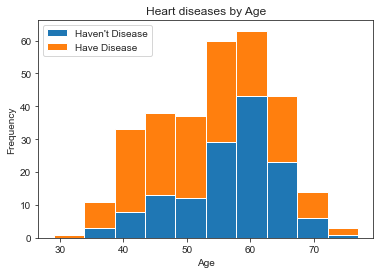

In [6]:
train.pivot(columns=['target'])['age'].\
    plot(kind='hist', stacked=True)
plt.title('Heart diseases by Age')
plt.xlabel('Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

### 2. Sex

Text(0.5, 1.0, 'Heart Disease Frequency for Sex')

Text(0.5, 0, 'Sex (0 = Female, 1 = Male)')

Text(0, 0.5, 'Frequency')

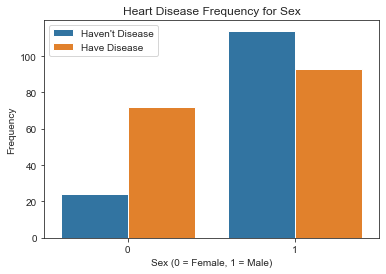

In [7]:
sns.countplot('sex',hue='target', data=train)
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

### 3. cp

<Figure size 1440x1080 with 0 Axes>

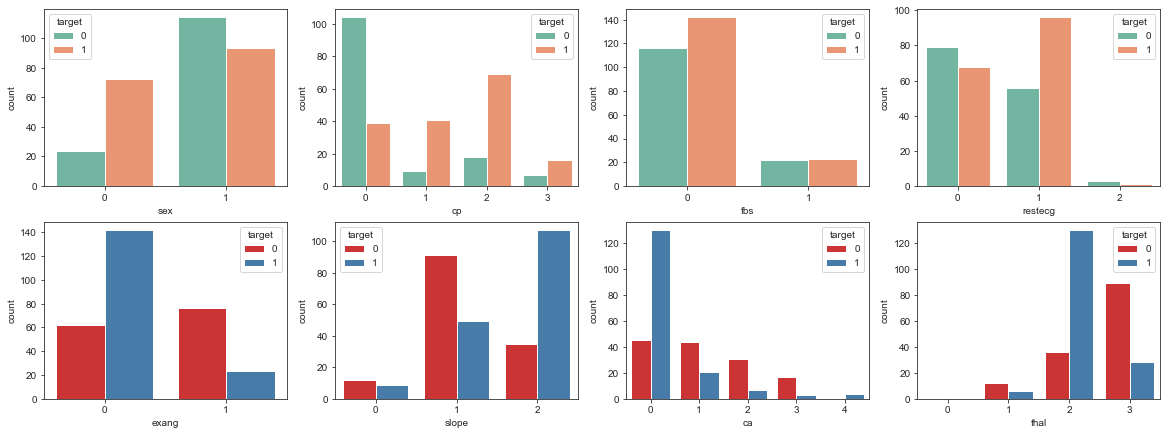

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.countplot(data=train,x='sex',hue='target',palette='Set2')
plt.subplot(4,4,2)
sns.countplot(data=train,x='cp',hue='target',palette='Set2')
plt.subplot(4,4,3)
sns.countplot(data=train,x='fbs',hue='target',palette='Set2')
plt.subplot(4,4,4)
sns.countplot(data=train,x='restecg',hue='target',palette='Set2')
plt.subplot(4,4,5)
sns.countplot(data=train,x='exang',hue='target',palette='Set1')
plt.subplot(4,4,6)
sns.countplot(data=train,x='slope',hue='target',palette='Set1')
plt.subplot(4,4,7)
sns.countplot(data=train,x='ca',hue='target',palette='Set1')
plt.subplot(4,4,8)
sns.countplot(data=train,x='thal',hue='target',palette='Set1')

## Model Building

In [9]:
data = train.drop('target',axis=1)
label= train['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=.2,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

In [16]:
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
          'p':[1, 2, 3, 4,5,6,7,8,9,10],
          'p':[1, 2, 3, 4,5,6,7,8,9,10],
          'leaf_size':list(range(1,20)),
          'weights':['uniform', 'distance']
          }


In [23]:
model = GridSearchCV(knn,params,cv=3, n_jobs=-1)

In [24]:
model.fit(X_train,y_train)
model.best_params_

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

{'leaf_size': 1, 'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}

In [25]:
predict = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7868852459016393
Using k-NN we get an accuracy score of:  78.689 %
